## Importacion de librerias

In [40]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta,date,time,timezone

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

## Importacion de datos

In [2]:
df_com = pd.read_csv("commercial_activity_df.csv", index_col="Unnamed: 0")
df_com = df_com.sort_values(by=["pk_cid", "pk_partition"])
df_com.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
4078994,15891,2018-07-28,2018-07-28,KAT,1.00,NaN
5319232,15891,2018-08-28,2018-07-28,KAT,0.00,02 - PARTICULARES
7451107,16063,2018-11-28,2018-11-19,KAT,1.00,NaN
8617948,16063,2018-12-28,2018-11-19,KAT,1.00,02 - PARTICULARES
9401149,16063,2019-01-28,2018-11-19,KAT,1.00,02 - PARTICULARES


In [3]:
df_socio = pd.read_csv("sociodemographic_df.csv",index_col="Unnamed: 0").sort_values(by=["pk_cid", "pk_partition"])
df_socio = df_socio.sort_values(by=["pk_cid", "pk_partition"])
df_socio.head()

,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary
4078994,15891,2018-07-28,ES,28.00,H,59,N,NaN
5319232,15891,2018-08-28,ES,28.00,H,59,N,NaN
7451107,16063,2018-11-28,ES,28.00,H,62,N,NaN
8617948,16063,2018-12-28,ES,28.00,H,62,N,NaN
9401149,16063,2019-01-28,ES,28.00,H,62,N,NaN


In [4]:
df_prod = pd.read_csv("products_df.csv", index_col="Unnamed: 0")
df_prod = df_prod.sort_values(by=["pk_cid", "pk_partition"])
df_prod.head()

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
4078994,15891,2018-07-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1
5319232,15891,2018-08-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,0
7451107,16063,2018-11-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,0
8617948,16063,2018-12-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,0
9401149,16063,2019-01-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,0


In [5]:
#creamos una lista con los productos para usar a futuro
lista_prod = pd.Index.to_list(df_prod.columns[2:])
lista_prod

['short_term_deposit',
 'loans',
 'mortgage',
 'funds',
 'securities',
 'long_term_deposit',
 'em_account_pp',
 'credit_card',
 'payroll',
 'pension_plan',
 'payroll_account',
 'emc_account',
 'debit_card',
 'em_account_p',
 'em_acount']

## Merge de las 3 tablas

In [6]:
### visualizacion de datos
df_total = df_com.merge(df_socio, how="inner", on=["pk_cid", "pk_partition"]).merge(df_prod,how="inner", on=["pk_cid", "pk_partition"] )
df_total.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,country_id,region_code,gender,age,deceased,salary,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
0,15891,2018-07-28,2018-07-28,KAT,1.00,NaN,ES,28.00,H,59,N,NaN,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1
1,15891,2018-08-28,2018-07-28,KAT,0.00,02 - PARTICULARES,ES,28.00,H,59,N,NaN,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,0
2,16063,2018-11-28,2018-11-19,KAT,1.00,NaN,ES,28.00,H,62,N,NaN,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,0
3,16063,2018-12-28,2018-11-19,KAT,1.00,02 - PARTICULARES,ES,28.00,H,62,N,NaN,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,0
4,16063,2019-01-28,2018-11-19,KAT,1.00,02 - PARTICULARES,ES,28.00,H,62,N,NaN,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,0


## EDA

#### Tamaño del dataset

In [7]:
# Tamaño del dataset
df_total.shape

(5962924, 27)

#### Tipos de atributos

In [8]:
#Tipo de atributos
print(df_total.dtypes)

pk_cid                  int64
pk_partition           object
entry_date             object
entry_channel          object
active_customer       float64
segment                object
country_id             object
region_code           float64
gender                 object
age                     int64
deceased               object
salary                float64
short_term_deposit      int64
loans                   int64
mortgage                int64
funds                   int64
securities              int64
long_term_deposit       int64
em_account_pp           int64
credit_card             int64
payroll               float64
pension_plan          float64
payroll_account         int64
emc_account             int64
debit_card              int64
em_account_p            int64
em_acount               int64
dtype: object


In [9]:
#clasificar las variables en 3 tipos: categoricas, numericas y binarias, y ponerlas en una lista

def tipo_de_var(data):
    ''' dividir los tipos de varibales en 3 listas distintas: categóricas, numericas y binarias'''
    var_total = data.columns
    var_numericas = list(data._get_numeric_data().columns)
  
    var_binarias = []
    var_categoricas = list(set(var_total) - set(var_numericas))
    for i in var_numericas:
        if (data[str(i)].min() == 0 and data[str(i)].max() == 1) and data[str(i)].min()== 0:
    
           var_binarias.append(i)
    
    var_numericas = list(set(var_numericas)- set(var_binarias))

  
    return var_numericas,var_binarias,var_categoricas
    
var_numericas,var_binarias,var_categoricas = tipo_de_var(df_total)

In [10]:
print("variables numericas: " + str(len(var_numericas)))
print("variables binarias: " + str(len(var_binarias)))
print("variables categoricas: " + str(len(var_categoricas)))


variables numericas: 5
variables binarias: 15
variables categoricas: 7


In [11]:
var_numericas

['em_account_pp', 'pk_cid', 'region_code', 'salary', 'age']

In [12]:
var_binarias

['active_customer',
 'short_term_deposit',
 'loans',
 'mortgage',
 'funds',
 'securities',
 'long_term_deposit',
 'credit_card',
 'payroll',
 'pension_plan',
 'payroll_account',
 'emc_account',
 'debit_card',
 'em_account_p',
 'em_acount']

In [13]:
var_categoricas

['gender',
 'entry_date',
 'country_id',
 'deceased',
 'entry_channel',
 'segment',
 'pk_partition']

#### Estadísticos descriptivos

In [14]:
df_total.describe().T

,count,mean,std,min,25%,50%,75%,max
pk_cid,"5,962,924.00","1,234,929.80","162,302.04","15,891.00","1,112,532.00","1,231,097.00","1,352,339.00","1,553,689.00"
active_customer,"5,962,924.00",0.40,0.49,0.00,0.00,0.00,1.00,1.00
region_code,"5,960,660.00",25.81,13.60,1.00,13.00,28.00,36.00,52.00
age,"5,962,924.00",29.76,11.98,2.00,22.00,25.00,34.00,105.00
salary,"4,450,821.00","115,816.72","199,551.89","1,202.73","61,500.63","88,654.65","131,669.91","28,894,395.51"
short_term_deposit,"5,962,924.00",0.00,0.05,0.00,0.00,0.00,0.00,1.00
loans,"5,962,924.00",0.00,0.01,0.00,0.00,0.00,0.00,1.00
mortgage,"5,962,924.00",0.00,0.01,0.00,0.00,0.00,0.00,1.00
funds,"5,962,924.00",0.00,0.06,0.00,0.00,0.00,0.00,1.00
securities,"5,962,924.00",0.00,0.06,0.00,0.00,0.00,0.00,1.00


#### Valores nulos

In [15]:
df_total.isna().sum()

pk_cid                      0
pk_partition                0
entry_date                  0
entry_channel          133033
active_customer             0
segment                133944
country_id                  0
region_code              2264
gender                     25
age                         0
deceased                    0
salary                1512103
short_term_deposit          0
loans                       0
mortgage                    0
funds                       0
securities                  0
long_term_deposit           0
em_account_pp               0
credit_card                 0
payroll                    61
pension_plan               61
payroll_account             0
emc_account                 0
debit_card                  0
em_account_p                0
em_acount                   0
dtype: int64

#### Duplicados

In [16]:
#duplicados - no hay valores duplicados - cada fila es un cliente-fecha partition
df_total[df_total.duplicated(keep=False)]

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,country_id,region_code,gender,age,deceased,salary,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount


#### Visualización de distribuciones

##### pk_cid

In [17]:
#hay un total de 456,373 clientes
df_total["pk_cid"].nunique()

456373

In [18]:
#unos se repiten todos los meses, 17, y otros aparecen solo en un mes
df_total["pk_cid"].value_counts()

1284769    17
1225085    17
1225068    17
1225069    17
1225070    17
           ..
1436688     1
1436690     1
1436701     1
1436729     1
1553689     1
Name: pk_cid, Length: 456373, dtype: int64

In [19]:
#ver ejemplo de un cliente que se repite todos los meses
df_total[df_total["pk_cid"]==1375586].T

,4751139,4751140,4751141,4751142,4751143,4751144,4751145,4751146,4751147,4751148,4751149,4751150,4751151,4751152,4751153,4751154,4751155
pk_cid,1375586,1375586,1375586,1375586,1375586,1375586,1375586,1375586,1375586,1375586,1375586,1375586,1375586,1375586,1375586,1375586,1375586
pk_partition,2018-01-28,2018-02-28,2018-03-28,2018-04-28,2018-05-28,2018-06-28,2018-07-28,2018-08-28,2018-09-28,2018-10-28,2018-11-28,2018-12-28,2019-01-28,2019-02-28,2019-03-28,2019-04-28,2019-05-28
entry_date,2018-01-12,2018-01-12,2018-01-12,2018-01-12,2018-01-12,2018-01-12,2018-01-12,2018-01-12,2018-01-12,2018-01-12,2018-01-12,2018-01-12,2018-01-12,2018-01-12,2018-01-12,2018-01-12,2018-01-12
entry_channel,KHL,KHL,KHL,KHL,KHL,KHL,KHL,KHL,KHL,KHL,KHL,KHL,KHL,KHL,KHL,KHL,KHL
active_customer,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
segment,02 - PARTICULARES,02 - PARTICULARES,02 - PARTICULARES,02 - PARTICULARES,02 - PARTICULARES,02 - PARTICULARES,02 - PARTICULARES,02 - PARTICULARES,02 - PARTICULARES,02 - PARTICULARES,02 - PARTICULARES,02 - PARTICULARES,02 - PARTICULARES,02 - PARTICULARES,02 - PARTICULARES,02 - PARTICULARES,02 - PARTICULARES
country_id,ES,ES,ES,ES,ES,ES,ES,ES,ES,ES,ES,ES,ES,ES,ES,ES,ES
region_code,29.00,29.00,29.00,29.00,29.00,29.00,29.00,29.00,29.00,29.00,29.00,29.00,29.00,29.00,29.00,29.00,29.00
gender,H,H,H,H,H,H,H,H,H,H,H,H,H,H,H,H,H
age,35,35,35,35,35,35,35,36,36,36,36,36,36,36,36,36,36


In [20]:
#ver ejemplo de un cliente que aparece sólo un mes, no necesariamente son los que han entrado el ultimo mes
df_total[df_total["pk_cid"]==1470941].T

,5562297
pk_cid,1470941
pk_partition,2018-10-28
entry_date,2018-10-06
entry_channel,NaN
active_customer,0.00
segment,NaN
country_id,ES
region_code,36.00
gender,H
age,46


##### pk_partition

In [21]:
df_total["pk_partition"].value_counts()

2019-05-28    442995
2019-04-28    439627
2019-03-28    436183
2019-02-28    431727
2019-01-28    426875
2018-12-28    422481
2018-11-28    416387
2018-10-28    402300
2018-09-28    375323
2018-08-28    352922
2018-07-28    339339
2018-06-28    252104
2018-05-28    249926
2018-04-28    247463
2018-03-28    245258
2018-02-28    242521
2018-01-28    239493
Name: pk_partition, dtype: int64

In [22]:
df_total['pk_partition'].nunique()

17

##### gráficos

<AxesSubplot:title={'center':'# de clientes por mes'}, xlabel='pk_partition'>

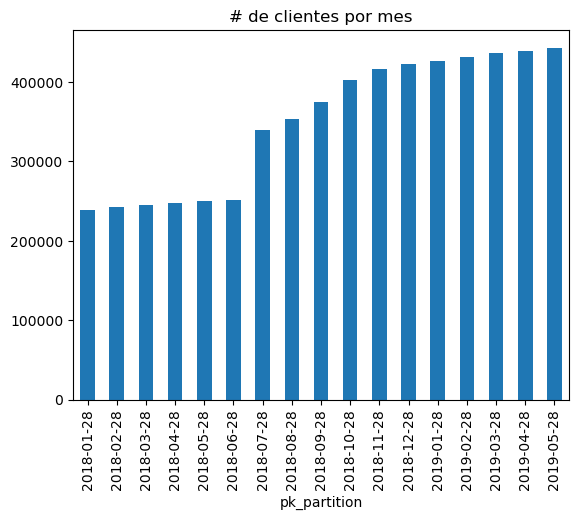

In [23]:
#para ver el numero total de clientes por cada mes
total_clientes= df_total.groupby(by="pk_partition")["pk_cid"].nunique()
total_clientes.plot(kind="bar", title="# de clientes por mes")

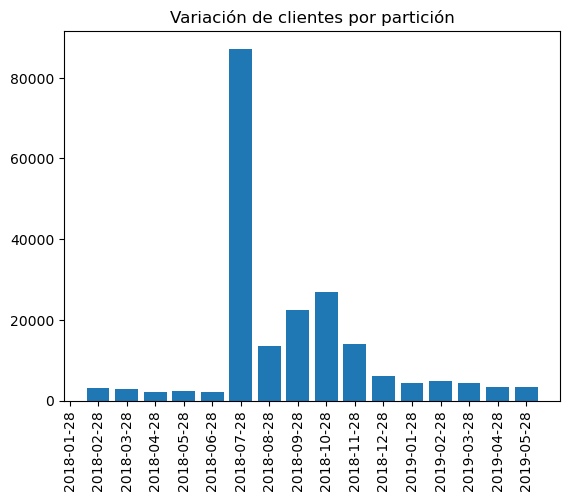

In [24]:
#veremos la variacion por mes de clientes
total_clientes = pd.DataFrame(total_clientes)
total_clientes['dif'] = total_clientes['pk_cid'] - total_clientes['pk_cid'].shift(1)
plt.bar(total_clientes.index,total_clientes['dif'])
plt.xticks(total_clientes.index, rotation=90)
plt.title('Variación de clientes por partición')
plt.show()

In [25]:
analisis_segment_partition_1 = df_total.groupby(['pk_partition', 'segment'])['pk_cid'].count().reset_index() # agrupamos por pk_partition y segment
analisis_segment_partition_2 = analisis_segment_partition_1.pivot(index='pk_partition', columns='segment', values='pk_cid') # pivotamos la tabla para que sea comprensible
analisis_segment_partition_2['total'] = analisis_segment_partition_2.sum(axis=1)
analisis_segment_partition_2['%_TOP'] = analisis_segment_partition_2['01 - TOP']/analisis_segment_partition_2['total']*100
analisis_segment_partition_2['%_PARTICULARES'] = analisis_segment_partition_2['02 - PARTICULARES']/analisis_segment_partition_2['total']*100
analisis_segment_partition_2['%_UNIVERSITARIO'] = analisis_segment_partition_2['03 - UNIVERSITARIO']/analisis_segment_partition_2['total']*100

C:\Users\Mikel\AppData\Local\Temp\ipykernel_24940\2881775209.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(analisis_segment_partition_2.index, rotation='vertical')


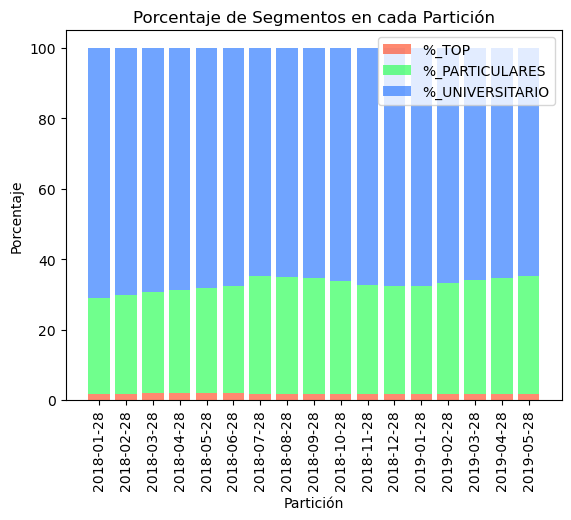

In [26]:

# Crear una figura y un eje para el gráfico
fig, ax = plt.subplots()

# Definir los colores para cada segmento
colores = ['#FF5733', '#33FF5D', '#337EFF']

# Crear un gráfico de barras apilado
bottom = None

for segment, color in zip(['%_TOP', '%_PARTICULARES', '%_UNIVERSITARIO'], colores):
    ax.bar(analisis_segment_partition_2.index, analisis_segment_partition_2[segment], label=segment, color=color, alpha=0.7, bottom=bottom)
    bottom = analisis_segment_partition_2[segment] if bottom is None else bottom + analisis_segment_partition_2[segment]

# Configurar etiquetas y leyendas
ax.set_xlabel('Partición')
ax.set_ylabel('Porcentaje')
ax.set_title('Porcentaje de Segmentos en cada Partición')
ax.legend()

# Personalizar la orientación de las etiquetas del eje X
ax.set_xticklabels(analisis_segment_partition_2.index, rotation='vertical')

# Mostrar el gráfico
plt.show()


In [27]:
# Vamos a cuantas altas y bajas tenemos por particion

# Ordena el DataFrame por 'pk_partition' si no está ordenado
df_seg = df_total.sort_values(by=['pk_partition'])

# Inicializa el conjunto de clientes en la primera partición
primer_conjunto_clientes = set(df_seg[df_seg['pk_partition'] == df_seg['pk_partition'].min()]['pk_cid'])

# Inicializa un diccionario para realizar un seguimiento de los nuevos y desaparecidos
seguimiento = {'particion': [], 'nuevos': [], 'desaparecidos': []}

# Itera a través de las particiones
particiones_unicas = df_seg['pk_partition'].unique()
for particion_actual in particiones_unicas:
    clientes_actual = set(df_seg[df_seg['pk_partition'] == particion_actual]['pk_cid'])
    
    # Calcula los nuevos y desaparecidos en comparación con la partición anterior
    nuevos = clientes_actual - primer_conjunto_clientes
    desaparecidos = primer_conjunto_clientes - clientes_actual
    
    # Registra los resultados en el diccionario de seguimiento
    seguimiento['particion'].append(particion_actual)
    seguimiento['nuevos'].append(len(nuevos))
    seguimiento['desaparecidos'].append(len(desaparecidos))
    
    # Actualiza el conjunto de clientes para la próxima partición
    primer_conjunto_clientes = clientes_actual

# Crea un DataFrame a partir del diccionario de seguimiento
df_seguimiento = pd.DataFrame(seguimiento)

# El resultado es un DataFrame con particiones, número de nuevos y número de desaparecidos en cada partición
print(df_seguimiento)

     particion  nuevos  desaparecidos
0   2018-01-28       0              0
1   2018-02-28    3767            739
2   2018-03-28    3486            749
3   2018-04-28    3094            889
4   2018-05-28    3216            753
5   2018-06-28    2999            821
6   2018-07-28   87235              0
7   2018-08-28   14596           1013
8   2018-09-28   23361            960
9   2018-10-28   28231           1254
10  2018-11-28   15587           1500
11  2018-12-28    7428           1334
12  2019-01-28    6963           2569
13  2019-02-28    6255           1403
14  2019-03-28    5741           1285
15  2019-04-28    4638           1194
16  2019-05-28    4588           1220


C:\Users\Mikel\AppData\Local\Temp\ipykernel_24940\755890732.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(analisis_segment_partition_2.index, rotation='vertical')


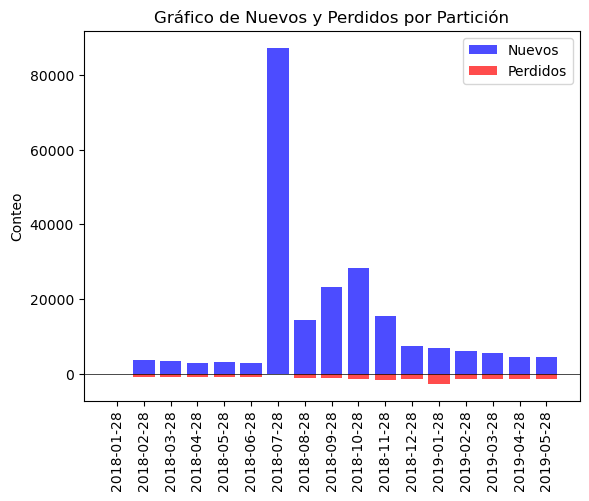

In [28]:
# Crear una figura y un eje para el gráfico
fig, ax = plt.subplots()

# Graficar barras de "nuevos" en el eje X positivo
ax.bar(df_seguimiento['particion'], df_seguimiento['nuevos'], label='Nuevos', color='blue', alpha=0.7)

# Graficar barras de "desaparecidos" en el eje X negativo
ax.bar(df_seguimiento['particion'], -df_seguimiento['desaparecidos'], label='Perdidos', color='red', alpha=0.7)

# Agregar una línea de referencia en el eje X en el valor 0
ax.axhline(0, color='black', linestyle='-', linewidth=0.5)

# Personalizar la orientación de las etiquetas del eje X
ax.set_xticklabels(analisis_segment_partition_2.index, rotation='vertical')

# Configurar etiquetas y leyendas

ax.set_ylabel('Conteo')
ax.set_title('Gráfico de Nuevos y Perdidos por Partición')
ax.legend()

# Mostrar el gráfico
plt.show()


In [29]:
# Vamos a obtener un diccionario con las particiones y los pk_cid que se dan de alta en esas particiones para poder analizar el perfil de la nuevas contrataciones.

# Creamos un primer DF donde se muestra en cada particion que usuario estaba dado de alta
pivot_dif = pd.pivot(df_total, index = 'pk_cid', columns='pk_partition', values='pk_cid').fillna(0)

# Inicializa un diccionario para almacenar los resultados
altas_usuarios = {}

# Itera a través de las columnas y calcula los índices donde la diferencia es mayor que 0 con respecto a la columna anterior
for i in range(1, len(pivot_dif.columns)):
    columna_actual = pivot_dif.columns[i]
    columna_anterior = pivot_dif.columns[i - 1]
    diferencia = pivot_dif[columna_actual] - pivot_dif[columna_anterior]
    indices_condicion = diferencia[diferencia > 0].index
    altas_usuarios[columna_actual] = list(indices_condicion)

# El resultado es un diccionario donde las claves son los nombres de las columnas y los valores son las listas de índices donde la diferencia es mayor que 0 con respecto a la columna anterior

In [30]:
# creamos un DF con los usuarios en la particion de su alta para analizar como se dan las altas

# Inicializar un DataFrame vacío para almacenar los datos de los usuarios
usuarios_seleccionados_df = pd.DataFrame(columns=df_total.columns)

# Iterar a través del diccionario y extraer los datos para cada partición
for particion, indices in altas_usuarios.items():
    usuarios_particion_df = df_total[(df_total['pk_partition'] == particion) & (df_total['pk_cid'].isin(indices))]
    usuarios_seleccionados_df = pd.concat([usuarios_seleccionados_df, usuarios_particion_df])

# cuantos productos tienen al darse de alta
usuarios_seleccionados_df['prod_en_alta'] = usuarios_seleccionados_df.iloc[:, 12:].sum(axis=1)




In [31]:
# Inicializar un DataFrame vacío para almacenar los datos de los usuarios
productos_entrada = pd.DataFrame(usuarios_seleccionados_df['pk_partition'].unique(),columns=['pk_partition'])

# Iterar a través del diccionario y extraer los datos para cada partición
for x in usuarios_seleccionados_df.iloc[:, 12:-1].columns:
    recuentos = pd.DataFrame(usuarios_seleccionados_df[usuarios_seleccionados_df[x] == 1].groupby(['pk_partition'])[x].count()).reset_index()
    productos_entrada = pd.merge(left=productos_entrada, right=recuentos, how='left')

# añadimos el total de altas por mes
productos_entrada = pd.merge(productos_entrada,pd.DataFrame(usuarios_seleccionados_df.groupby('pk_partition')['pk_cid'].count()).reset_index().rename(columns={'pk_cid': 'total_altas'}))  

# añadimos tambien cuantos productos contratan las altas nuevas
for i in range(0,7):
    recuentos_a = pd.DataFrame(usuarios_seleccionados_df[usuarios_seleccionados_df['prod_en_alta'] == i].groupby(['pk_partition'])['prod_en_alta'].count()).reset_index().rename(columns={'prod_en_alta':f'{i}_prod_alta'})
    productos_entrada = pd.merge(left=productos_entrada, right=recuentos_a, how='left')


C:\Users\Mikel\AppData\Local\Temp\ipykernel_24940\1246689238.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(productos_entrada.pk_partition, rotation='vertical')
C:\Users\Mikel\AppData\Local\Temp\ipykernel_24940\1246689238.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(productos_entrada.pk_partition, rotation='vertical')


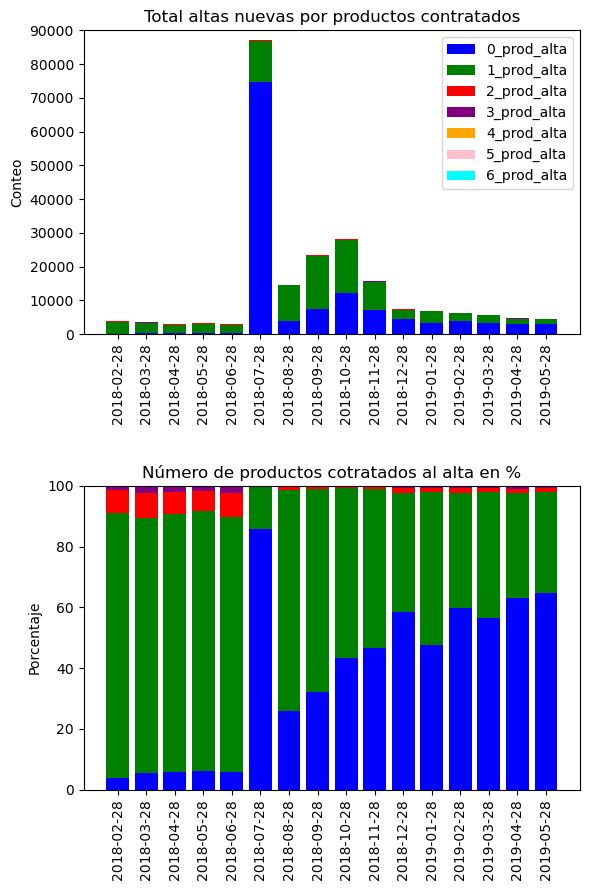

In [32]:
# Crear una figura con dos subplots, una fila y dos columnas
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 9))

# GRAFICO 1
columnas1 = productos_entrada.columns[17:]

# Colores para las barras
colores1 = ['blue', 'green', 'red', 'purple', 'orange', 'pink','cyan']

# Inicializar la posición en 0
bottom = [0] * len(productos_entrada)

# Crear barras apiladas
for columna, color in zip(columnas1, colores1):
    ax1.bar(productos_entrada.pk_partition, productos_entrada[columna], label=columna, color=color, bottom=bottom)
    bottom = [bottom[i] + productos_entrada[columna][i] for i in range(len(productos_entrada))]

# Definir el rango del eje Y 
ax1.set_ylim(0, 90000)

# Configurar etiquetas y leyendas
ax1.set_ylabel('Conteo')
ax1.set_title('Total altas nuevas por productos contratados')
ax1.legend()

# Personalizar la orientación de las etiquetas del eje X
ax1.set_xticklabels(productos_entrada.pk_partition, rotation='vertical')


# GRAFICO 2
df_prod_alta_0 = productos_entrada.drop(columns=productos_entrada.columns[1:17])
# Calcular el total por fila (suma de todas las columnas)
df_prod_alta_0['Total'] = df_prod_alta_0.iloc[:, 1:].sum(axis=1)

# Calcular los porcentajes para cada columna
columnas2 = df_prod_alta_0.columns[1:-1]

for columna in columnas2:
    df_prod_alta_0[f'{columna}_Porcentaje'] = (df_prod_alta_0[columna] / df_prod_alta_0['Total']) * 100

# Colores para las barras
colores2 = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'cyan']

# Inicializar la posición en 0
bottom = [0] * len(productos_entrada)

# Crear barras apiladas en porcentaje
for columna, color in zip(columnas2, colores2):
    ax2.bar(df_prod_alta_0['pk_partition'], df_prod_alta_0[f'{columna}_Porcentaje'], label=columna, color=color, bottom=bottom)
    bottom = [bottom[i] + df_prod_alta_0[f'{columna}_Porcentaje'][i] for i in range(len(df_prod_alta_0))]

# Configurar etiquetas y leyendas
ax2.set_ylabel('Porcentaje')
ax2.set_title('Número de productos cotratados al alta en %')


# Personalizar la orientación de las etiquetas del eje X
ax2.set_xticklabels(productos_entrada.pk_partition, rotation='vertical')

# Ajustar el espacio entre los subplots
plt.tight_layout()
# Ajustar el espacio entre los subplots
plt.subplots_adjust(hspace=0.5)
# Mostrar la figura con los dos subplots uno al lado del otro
plt.show()

C:\Users\Mikel\AppData\Local\Temp\ipykernel_24940\3084723845.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(productos_entrada.pk_partition, rotation='vertical')
C:\Users\Mikel\AppData\Local\Temp\ipykernel_24940\3084723845.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(productos_entrada.pk_partition, rotation='vertical')
C:\Users\Mikel\AppData\Local\Temp\ipykernel_24940\3084723845.py:90: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(productos_entrada_tipo.pk_partition, rotation='vertical')
C:\Users\Mikel\AppData\Local\Temp\ipykernel_24940\3084723845.py:114: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(productos_entrada_tipo.pk_partition, rotation='vertical')


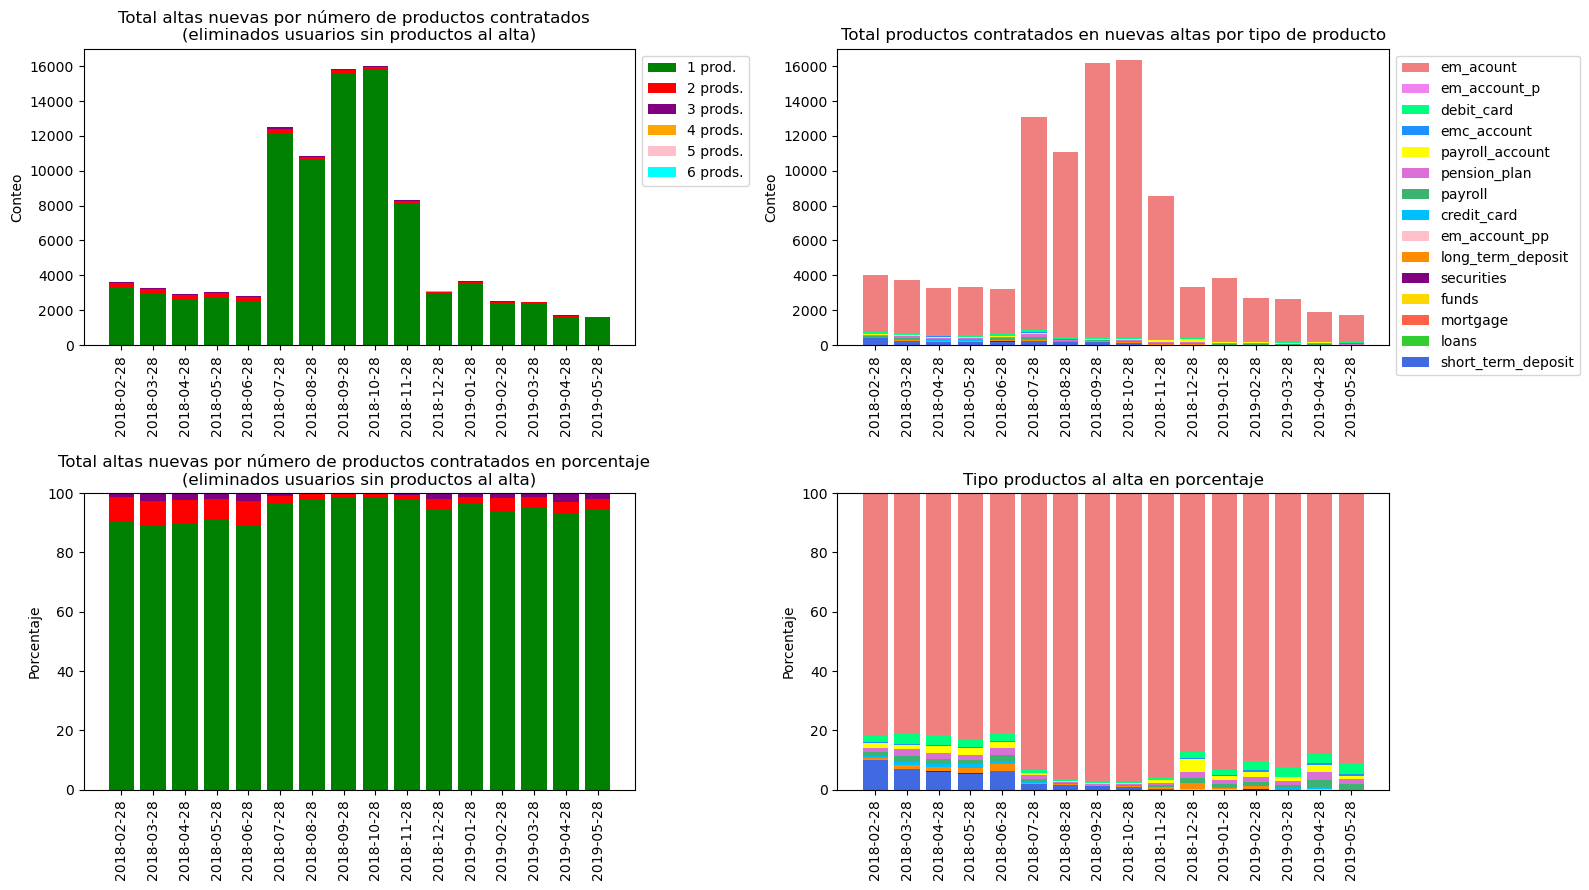

In [33]:
# Crear una figura con dos subplots, una fila y dos columnas
fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(2, 2, figsize=(16, 9))

# GRAFICO 1
columnas1 = productos_entrada.columns[18:]
colores1 = ['green', 'red', 'purple', 'orange', 'pink', 'cyan']
bottom1 = [0] * len(productos_entrada)

for columna, color in zip(columnas1, colores1):
    ax1.bar(productos_entrada.pk_partition, productos_entrada[columna], label=columna, color=color, bottom=bottom1)
    bottom1 = [bottom1[i] + productos_entrada[columna][i] for i in range(len(productos_entrada))]


handles, labels = ax1.get_legend_handles_labels()
nuevos_labels = {
    '1_prod_alta': '1 prod.',
    '2_prod_alta': '2 prods.',
    '3_prod_alta': '3 prods.',
    '4_prod_alta': '4 prods.',
    '5_prod_alta': '5 prods.',
    '6_prod_alta': '6 prods.'}
nuevos_labels = [nuevos_labels[label] if label in nuevos_labels else label for label in labels]


ax1.set_ylabel('Conteo')
ax1.set_title('Total altas nuevas por número de productos contratados  \n(eliminados usuarios sin productos al alta)')
ax1.legend(handles, nuevos_labels, loc='upper left', bbox_to_anchor=(1, 1))
ax1.set_xticklabels(productos_entrada.pk_partition, rotation='vertical')

# Definir el rango del eje Y 
ax1.set_ylim(0, 17000)

# GRAFICO 2
productos_entrada_porcentaje = productos_entrada.copy()
productos_entrada_porcentaje['TOTAL'] = productos_entrada_porcentaje[productos_entrada_porcentaje.columns[18:]].sum(axis=1)
columnas1 = productos_entrada.columns[18:]
for columna in columnas1:
    productos_entrada_porcentaje[columna] = (productos_entrada[columna] / productos_entrada_porcentaje['TOTAL']) * 100


# Colores para las barras
colores2 = ['green', 'red', 'purple', 'orange', 'pink', 'cyan']
bottom2 = [0] * len(productos_entrada)

# Crear barras apiladas en porcentajes
for columna, color in zip(columnas1, colores2):
    ax2.bar(productos_entrada.pk_partition, productos_entrada_porcentaje[columna], label=columna, color=color, bottom=bottom2)
    bottom2 = [bottom2[i] + productos_entrada_porcentaje[columna][i] for i in range(len(productos_entrada))]

# Configurar etiquetas y leyendas
ax2.set_ylabel('Porcentaje')
ax2.set_title('Total altas nuevas por número de productos contratados en porcentaje  \n(eliminados usuarios sin productos al alta)')
ax2.set_xticklabels(productos_entrada.pk_partition, rotation='vertical')


# Definir el rango del eje Y (por ejemplo, de 0 a 100)
ax2.set_ylim(0, 100)

# GRAFICO 3
#creamos un df nuevo para este analisis

productos_entrada_tipo = productos_entrada.iloc[:, :16].fillna(0)

columnas1 = productos_entrada_tipo.columns[1:]

# Colores para las barras
colores3 = ['royalblue', 'limegreen', 'tomato', 'gold', 'purple', 'darkorange', 'pink', 'deepskyblue', 'mediumseagreen',
    'orchid', 'yellow', 'dodgerblue', 'springgreen', 'violet', 'lightcoral']

# Inicializar la posición en 0
bottom = [0] * len(productos_entrada_tipo)

# Crear barras apiladas
for columna, color in zip(columnas1, colores3):
    ax3.bar(productos_entrada_tipo.pk_partition, productos_entrada_tipo[columna], label=columna, color=color, bottom=bottom)
    bottom = [bottom[i] + productos_entrada_tipo[columna][i] for i in range(len(productos_entrada_tipo))]

# Configurar etiquetas y leyendas
ax3.set_ylabel('Conteo')
ax3.set_title('Total productos contratados en nuevas altas por tipo de producto')

# Invertir el orden de las etiquetas en la leyenda
handles, labels = ax3.get_legend_handles_labels()
ax3.legend(reversed(handles), reversed(labels),loc='upper left', bbox_to_anchor=(1, 1))
 
# Definir el rango del eje Y 
ax3.set_ylim(0, 17000)

# Personalizar la orientación de las etiquetas del eje X
ax3.set_xticklabels(productos_entrada_tipo.pk_partition, rotation='vertical')

# GRAFICO 4

# Calcular los porcentajes para cada columna
productos_entrada_tipo_porcentaje = productos_entrada_tipo.copy()
columnas2 = productos_entrada_tipo.columns[1:]
productos_entrada_tipo_porcentaje[columnas2] = productos_entrada_tipo[columnas2].div(productos_entrada_tipo[columnas2].sum(axis=1), axis=0) * 100



# Inicializar la posición en 0
bottom = [0] * len(productos_entrada_tipo)

# Crear barras apiladas
for columna, color in zip(columnas2, colores3):
    ax4.bar(productos_entrada_tipo.pk_partition, productos_entrada_tipo_porcentaje[columna], label=columna, color=color, bottom=bottom)
    bottom = [bottom[i] + productos_entrada_tipo_porcentaje[columna][i] for i in range(len(productos_entrada_tipo_porcentaje))]

# Configurar etiquetas y leyendas
ax4.set_ylabel('Porcentaje')
ax4.set_title('Tipo productos al alta en porcentaje')

# Personalizar la orientación de las etiquetas del eje X
ax4.set_xticklabels(productos_entrada_tipo.pk_partition, rotation='vertical')

# Definir el rango del eje Y (por ejemplo, de 0 a 100)
ax4.set_ylim(0, 100)

# Ajustar el espacio entre los subplots
plt.tight_layout()
# Ajustar el espacio entre los subplots
plt.subplots_adjust(hspace=0.5)
# Mostrar la figura con los dos subplots uno al lado del otro
plt.show()

C:\Users\Mikel\AppData\Local\Temp\ipykernel_24940\2569502888.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax5.set_xticklabels(productos_entrada_tipo.pk_partition, rotation='vertical')


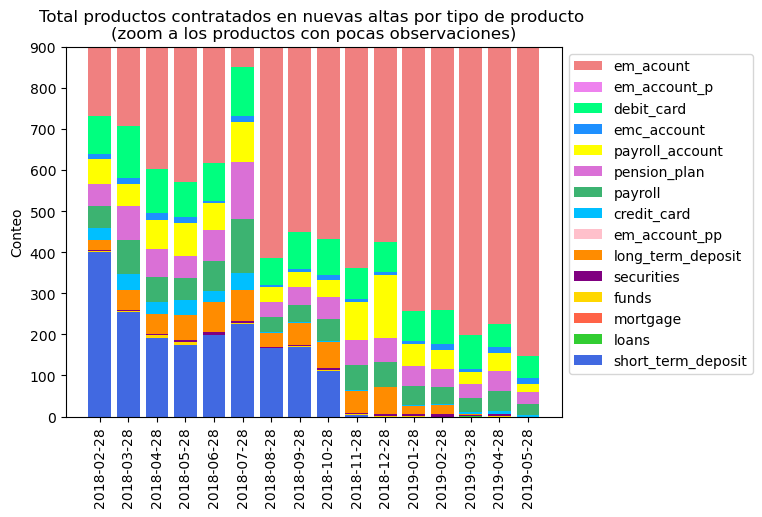

In [34]:
# Crear una figura con dos subplots, una fila y dos columnas
fig, ax5= plt.subplots()

# GRAFICO 5
#creamos un df nuevo para este analisis

productos_entrada_tipo = productos_entrada.iloc[:, :16].fillna(0)

columnas5 = productos_entrada_tipo.columns[1:]

# Colores para las barras
colores5 = ['royalblue', 'limegreen', 'tomato', 'gold', 'purple', 'darkorange', 'pink', 'deepskyblue', 'mediumseagreen',
    'orchid', 'yellow', 'dodgerblue', 'springgreen', 'violet', 'lightcoral']

# Inicializar la posición en 0
bottom = [0] * len(productos_entrada_tipo)

# Crear barras apiladas
for columna, color in zip(columnas5, colores5):
    ax5.bar(productos_entrada_tipo.pk_partition, productos_entrada_tipo[columna], label=columna, color=color, bottom=bottom)
    bottom = [bottom[i] + productos_entrada_tipo[columna][i] for i in range(len(productos_entrada_tipo))]

# Configurar etiquetas y leyendas
ax5.set_ylabel('Conteo')
ax5.set_title('Total productos contratados en nuevas altas por tipo de producto \n(zoom a los productos con pocas observaciones)')

# Invertir el orden de las etiquetas en la leyenda
handles, labels = ax5.get_legend_handles_labels()
ax5.legend(reversed(handles), reversed(labels), loc='upper left', bbox_to_anchor=(1, 1))

# Definir el rango del eje Y 
ax5.set_ylim(0, 900)

# Personalizar la orientación de las etiquetas del eje X
ax5.set_xticklabels(productos_entrada_tipo.pk_partition, rotation='vertical')

# Mostrar la figura con los dos subplots uno al lado del otro
plt.show()

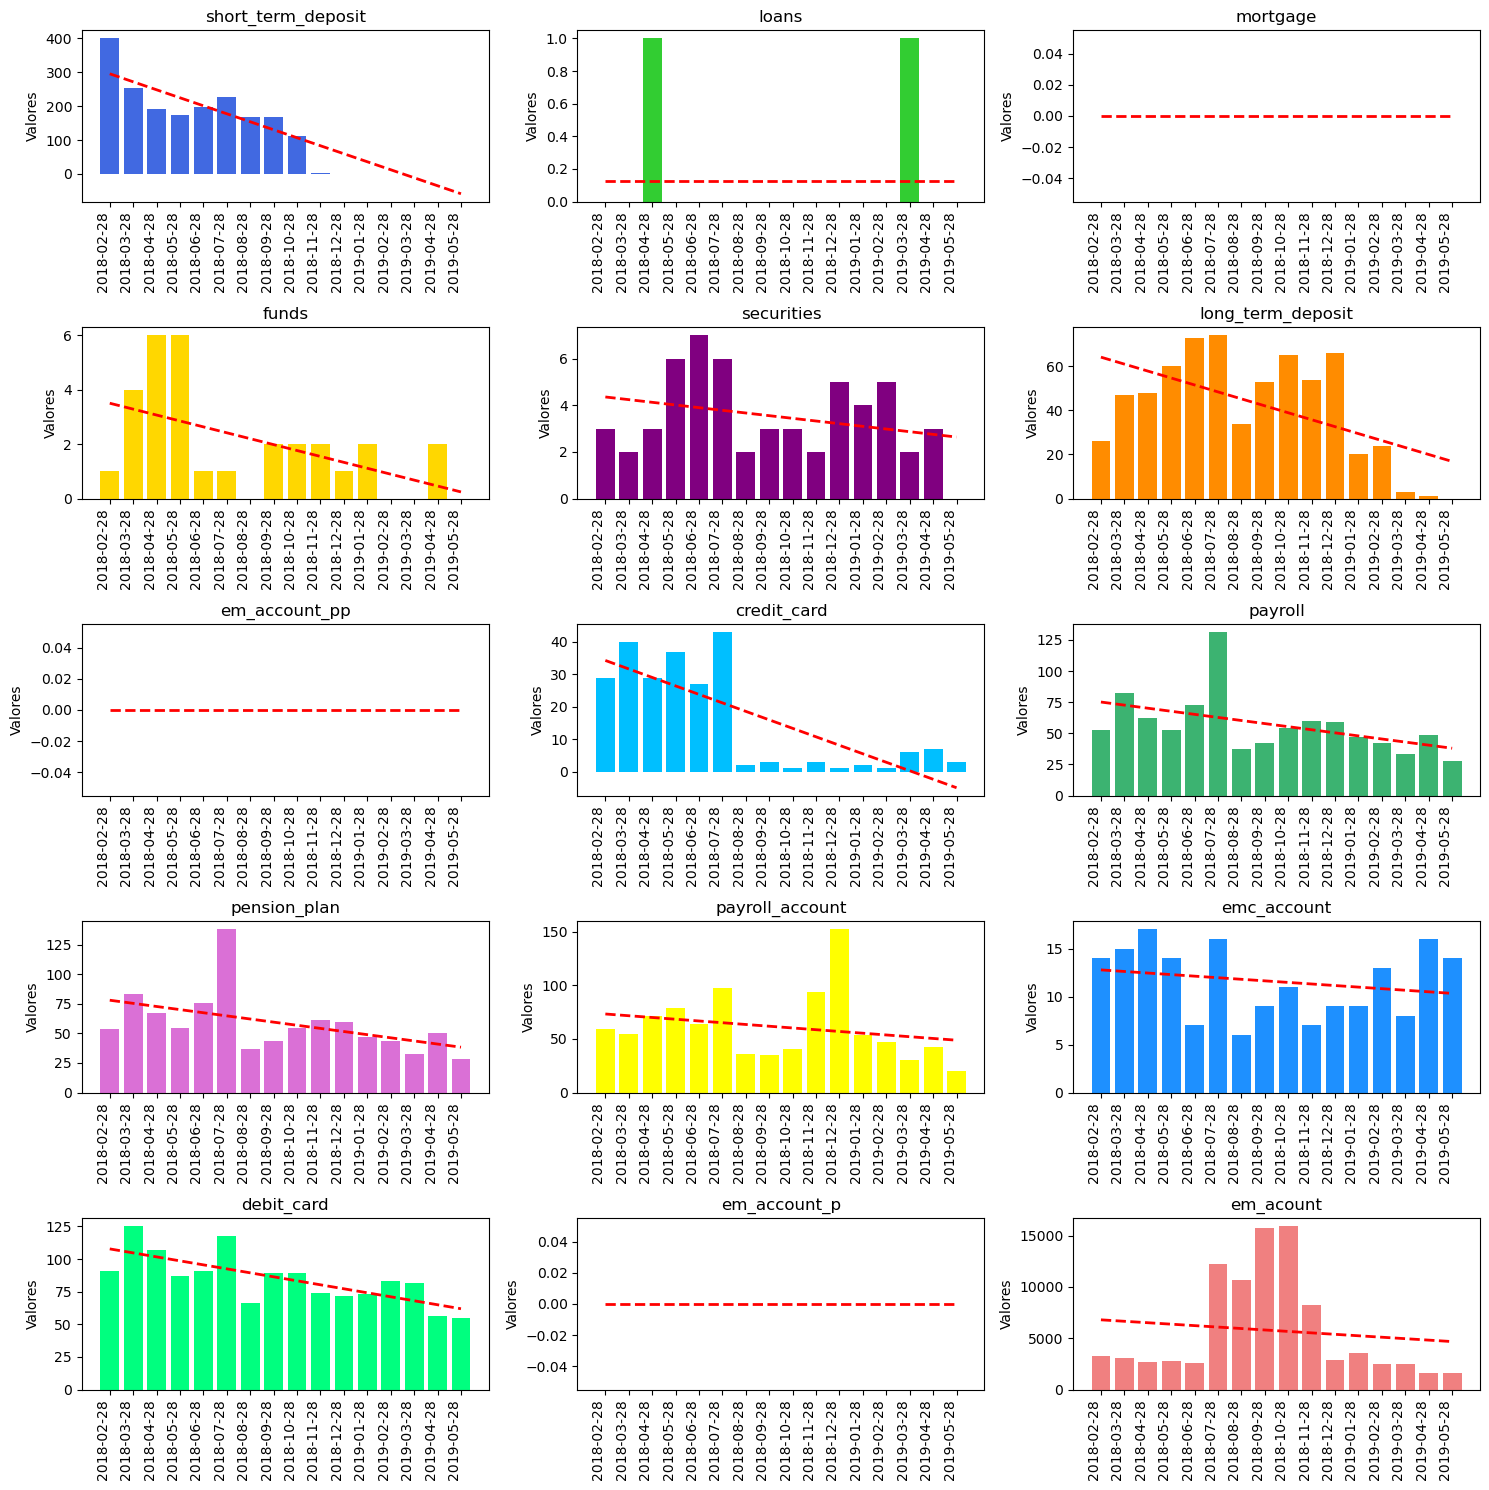

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo para el eje x y las 15 variables en el eje y
particiones = productos_entrada['pk_partition'].values  # Eje x
variables = productos_entrada.iloc[:, 1:16].fillna(0).values  # Valores de las 15 variables
colores = ['royalblue', 'limegreen', 'tomato', 'gold', 'purple', 'darkorange', 'pink', 'deepskyblue', 'mediumseagreen',
    'orchid', 'yellow', 'dodgerblue', 'springgreen', 'violet', 'lightcoral']  # Colores para las barras

columnas = productos_entrada.columns[1:16]  # Nombres de las columnas

# Configura la figura con 5 filas y 3 columnas
fig, axs = plt.subplots(5, 3, figsize=(15, 15))

for i, columna in enumerate(columnas):
    color = colores[i % len(colores)]  # Cicla a través de los colores
    values = variables[:, i]  # Valores para la variable actual

    # Calcula la posición (fila y columna) del gráfico actual
    row = i // 3
    col = i % 3

    # Agrega un valor predeterminado (cero) para la última pk_partition si falta
    if len(particiones) == len(values) - 1:
        particiones = np.append(particiones, particiones[-1])

    # Crea un gráfico de barras para la variable actual en la ubicación correspondiente
    axs[row, col].bar(particiones, values, color=color)
    axs[row, col].set_title(columna)
    axs[row, col].set_xticks(particiones)
    axs[row, col].set_xticklabels(particiones, rotation=90, ha="right")
    axs[row, col].set_ylabel('Valores')

    # Calcula una línea de tendencia si hay suficientes datos
    if len(particiones) >= 2:
        trend_line = np.polyfit(np.arange(len(particiones)), values, 1)
        axs[row, col].plot(particiones, np.polyval(trend_line, np.arange(len(particiones))), color='red', linestyle='--', linewidth=2)

# Ajusta el espacio entre los subplots
plt.tight_layout()
plt.show()


In [36]:
#productos totales y diferencia por mes
prod_total= pd.DataFrame(df_total.groupby(by="pk_partition")[lista_prod].sum())
prod_total["total"] = prod_total[lista_prod].sum(axis=1)
prod_total["diff"] = prod_total["total"]-prod_total["total"].shift(1)
prod_total

,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,total,diff
pk_partition,,,,,,,,,,,,,,,,,
2018-01-28,883,19,15,786,932,4884,0,3325,"8,145.00","8,835.00",13478,15320,24696,2,215293,"296,613.00",NaN
2018-02-28,1343,19,15,872,965,4956,0,3282,"8,889.00","9,496.00",14246,15827,25448,2,217098,"302,458.00","5,845.00"
2018-03-28,1664,23,17,969,965,4965,0,3511,"9,735.00","9,882.00",14989,16428,27046,2,218683,"308,879.00","6,421.00"
2018-04-28,1740,24,17,1084,983,5107,0,3725,"9,905.00","10,560.00",15825,16947,27764,2,219816,"313,499.00","4,620.00"
2018-05-28,1455,27,18,1145,1012,5356,0,3797,"9,994.00","10,148.00",16697,17569,27911,2,221291,"316,422.00","2,923.00"
2018-06-28,1244,27,19,1159,1019,5588,0,4002,"10,946.00","11,635.00",15540,17950,28828,2,224328,"322,287.00","5,865.00"
2018-07-28,1282,28,20,1172,1053,5796,0,4137,"11,888.00","12,779.00",16916,18185,29578,2,234324,"337,160.00","14,873.00"
2018-08-28,1335,29,20,1219,1133,5923,0,4206,"11,383.00","12,126.00",18118,18333,29205,2,245980,"349,012.00","11,852.00"
2018-09-28,1386,31,20,1237,1201,6158,0,4289,"11,850.00","12,624.00",18862,18618,31684,2,261210,"369,172.00","20,160.00"


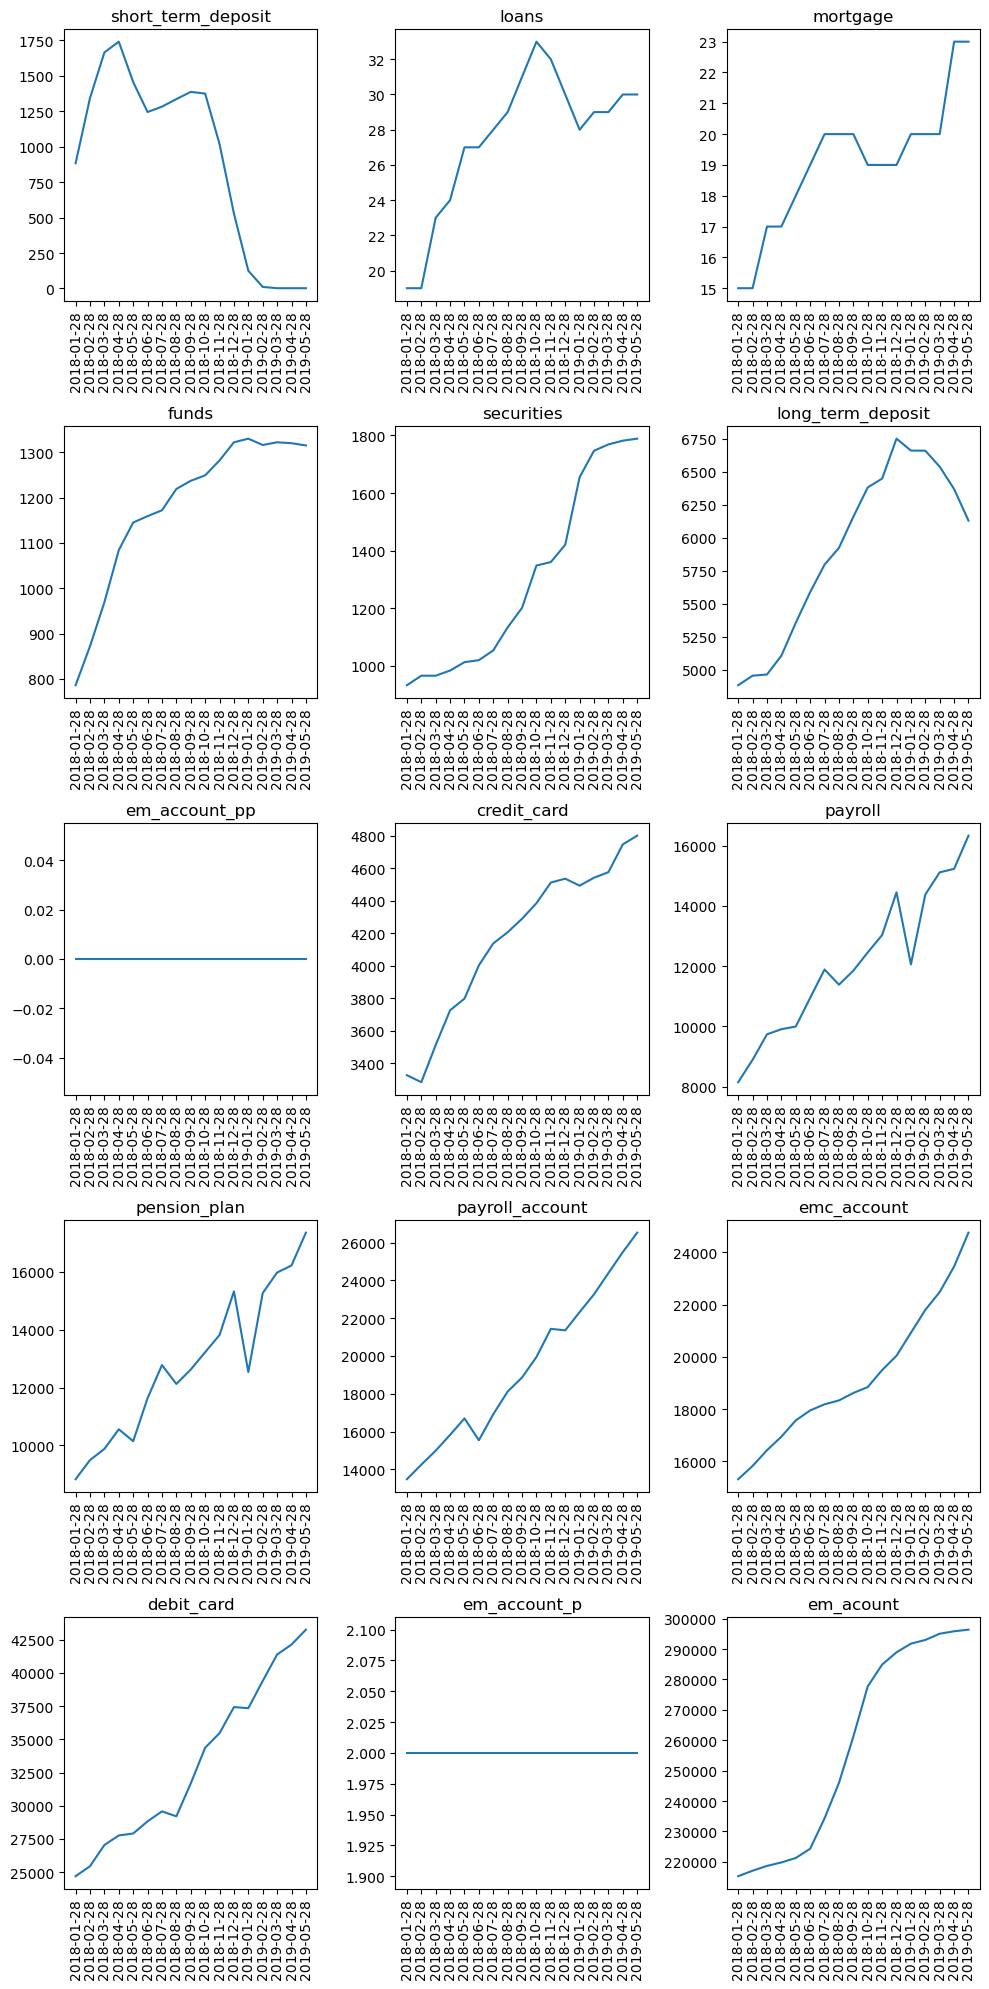

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10, 20))

for i, prod in enumerate(lista_prod):
    ax = axes[i // 3][i % 3]
    sns.lineplot(data=prod_total, x=prod_total.index, y=prod_total[prod], ax=ax)
    ax.set_title(prod)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x', labelrotation=90)
plt.tight_layout()



plt.show()

In [75]:
var_categoricas2 = ["segment", "gender", "deceased"]

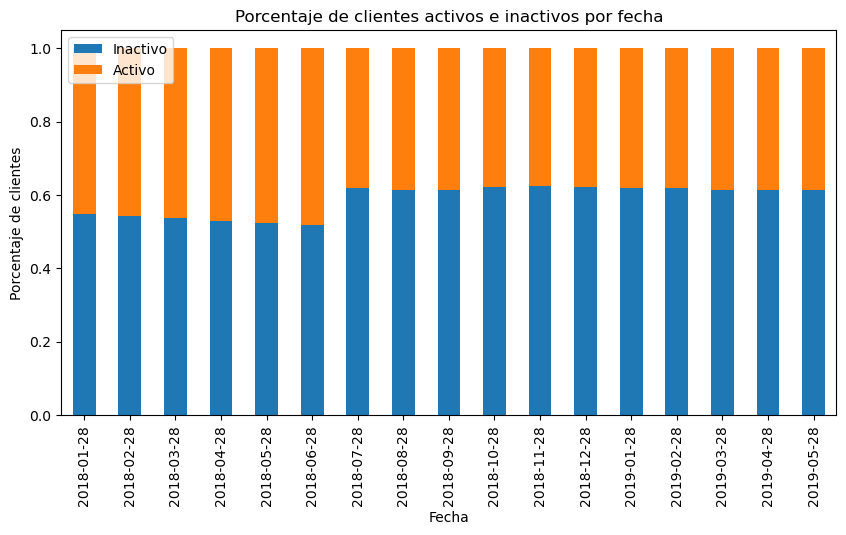

In [140]:
# Crear un DataFrame con los porcentajes de clientes activos e inactivos por fecha
clientes_activos_por_fecha = df_total.groupby(['pk_partition', 'active_customer'])['pk_cid'].nunique().unstack()
clientes_activos_por_fecha = clientes_activos_por_fecha.apply(lambda x: x/x.sum(), axis=1)

# Crear el gráfico de barras apiladas
ax = clientes_activos_por_fecha.plot(kind='bar', stacked=True, figsize=(10,5))

# Añadir etiquetas y leyenda
ax.set_xlabel('Fecha')
ax.set_ylabel('Porcentaje de clientes')
ax.set_title('Porcentaje de clientes activos e inactivos por fecha')
ax.legend(['Inactivo', 'Activo'], loc='upper left')

In [38]:
df_total_anal_ult = df_total[df_total['pk_partition'] == '2019-05-28'][['pk_partition','segment', 'country_id', 'region_code', 'gender', 'age', 'deceased', 'salary','entry_channel']]

In [41]:
# Contar la frecuencia de cada valor en la columna 'entry_channel'
value_counts = df_total_anal_ult['entry_channel'].value_counts().reset_index()
value_counts.columns = ['entry_channel', 'count']

# Calcular el porcentaje
value_counts['percentage'] = (value_counts['count'] / value_counts['count'].sum()) * 100

# Crear el treemap con Plotly
fig = go.Figure(go.Treemap(
    labels=value_counts['entry_channel'],
    parents=['' for _ in value_counts['entry_channel']],
    values=value_counts['count'],
    customdata=value_counts['percentage'],
    textinfo="label+percent parent",
))

fig.update_layout(title='Treemap de entry_channel')
fig.show()


In [42]:
# Contar la frecuencia de cada valor en la columna 'entry_channel'
value_counts = df_total_anal_ult['country_id'].value_counts().reset_index()
value_counts.columns = ['country_id', 'count']

# Calcular el porcentaje
value_counts['percentage'] = (value_counts['count'] / value_counts['count'].sum()) * 100

# Crear el treemap con Plotly
fig = go.Figure(go.Treemap(
    labels=value_counts['country_id'],
    parents=['' for _ in value_counts['country_id']],
    values=value_counts['count'],
    customdata=value_counts['percentage'],
    textinfo="label+percent parent",
))

fig.update_layout(title='Treemap de country_id')
fig.show()

In [43]:
codigo_a_provincia = {
    1: 'Álava',
    2: 'Albacete',
    3: 'Alicante',
    4: 'Almería',
    33: 'Asturias',
    5: 'Ávila',
    6: 'Badajoz',
    7: 'Baleares',
    8: 'Barcelona',
    48: 'Bizkaia',
    9: 'Burgos',
    10: 'Cáceres',
    11: 'Cádiz',
    39: 'Cantabria',
    12: 'Castellón',
    51: 'Ceuta',
    13: 'Ciudad Real',
    14: 'Córdoba',
    15: 'A Coruña',
    16: 'Cuenca',
    20: 'Gipuzkoa',
    17: 'Girona',
    18: 'Granada',
    19: 'Guadalajara',
    21: 'Huelva',
    22: 'Huesca',
    23: 'Jaén',
    24: 'León',
    25: 'Lleida',
    27: 'Lugo',
    28: 'Madrid',
    29: 'Málaga',
    30: 'Murcia',
    31: 'Navarra',
    32: 'Ourense',
    34: 'Palencia',
    35: 'Las Palmas',
    36: 'Pontevedra',
    26: 'La Rioja',
    37: 'Salamanca',
    38: 'Santa Cruz de Tenerife',
    40: 'Segovia',
    41: 'Sevilla',
    42: 'Soria',
    43: 'Tarragona',
    44: 'Teruel',
    45: 'Toledo',
    46: 'Valencia',
    47: 'Valladolid',
    49: 'Zamora',
    50: 'Zaragoza',
}

df_total_anal_ult['nombre_provincia'] = df_total_anal_ult['region_code'].map(codigo_a_provincia)

In [44]:
codigo_provincia_a_comunidad = {
    4: 'Andalucía',
    11: 'Andalucía',
    14: 'Andalucía',
    18: 'Andalucía',
    21: 'Andalucía',
    23: 'Andalucía',
    29: 'Andalucía',
    41: 'Andalucía',
    22: 'Aragón',
    44: 'Aragón',
    50: 'Aragón',
    33: 'Asturias, Principado de',
    7: 'Balears, Illes',
    35: 'Canarias',
    38: 'Canarias',
    39: 'Cantabria',
    5: 'Castilla y León',
    9: 'Castilla y León',
    24: 'Castilla y León',
    34: 'Castilla y León',
    37: 'Castilla y León',
    40: 'Castilla y León',
    42: 'Castilla y León',
    47: 'Castilla y León',
    49: 'Castilla y León',
    2: 'Castilla-La Mancha',
    13: 'Castilla-La Mancha',
    16: 'Castilla-La Mancha',
    19: 'Castilla-La Mancha',
    45: 'Castilla-La Mancha',
    8: 'Cataluña',
    17: 'Cataluña',
    25: 'Cataluña',
    43: 'Cataluña',
    3: 'Comunitat Valenciana',
    12: 'Comunitat Valenciana',
    46: 'Comunitat Valenciana',
    6: 'Extremadura',
    10: 'Extremadura',
    15: 'Galicia',
    27: 'Galicia',
    32: 'Galicia',
    36: 'Galicia',
    28: 'Madrid, Comunidad de',
    30: 'Murcia, Región de',
    31: 'Navarra, Comunidad Foral de',
    1: 'País Vasco',
    48: 'País Vasco',
    20: 'País Vasco',
    26: 'Rioja, La',
    51: 'Ceuta',
    52: 'Melilla',
}


df_total_anal_ult['comunidad_autonoma'] = df_total_anal_ult['region_code'].map(codigo_provincia_a_comunidad)

In [45]:
# Contar las observaciones para cada combinación de comunidad autónoma y provincia
conteo = df_total_anal_ult.groupby(['comunidad_autonoma', 'nombre_provincia']).size().reset_index(name='observaciones')

# Personaliza la paleta de colores
colores_personalizados = px.colors.sequential.Peach  # Cambia esta paleta por la que desees

# Crea el treemap anidado con colores personalizados
fig = px.treemap(conteo, 
                 path=['comunidad_autonoma', 'nombre_provincia'], 
                 values='observaciones', 
                 color='observaciones',
                 color_continuous_scale=colores_personalizados)

# Personalizar el título
fig.update_layout(title='Treemap Anidado para Comunidades Autónomas y Provincias')

# Mostrar el gráfico interactivo
fig.show()


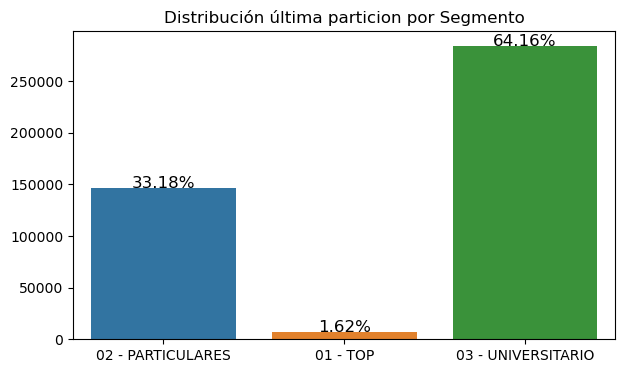

In [46]:
# Analizamos los segmentos para ver como se distribuyern

# Calcular el total de observaciones
total_observaciones = len(df_total_anal_ult)

# Crear el gráfico de barras
plt.figure(figsize=(7, 4))
ax = sns.countplot(x='segment', data=df_total_anal_ult)

# Etiquetar las barras con porcentajes más grandes
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3,
            f'{height / total_observaciones:.2%}', ha="center", fontsize=12)  # Ajustar el tamaño de fuente aquí



# Personalizar el gráfico

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Distribución última particion por Segmento')

plt.show()


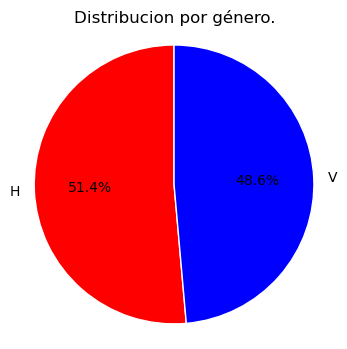

In [47]:
# Contar la frecuencia de 'h' y 'v' en la columna 'variable'
conteo = df_total_anal_ult['gender'].value_counts()

# Etiquetas y valores para el gráfico de rosca
etiquetas = conteo.index
valores = conteo.values

# Colores para cada categoría ('h' y 'v')
colores = ['red', 'blue']

# Crear un gráfico de rosca
plt.figure(figsize=(4, 4))
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=90, colors=colores, wedgeprops={'edgecolor': 'white'})



# Añadir un título
plt.title('Distribucion por género.')

# Mostrar el gráfico
plt.axis('equal')  # Proporción de aspecto igual para que se vea como un círculo
plt.show()

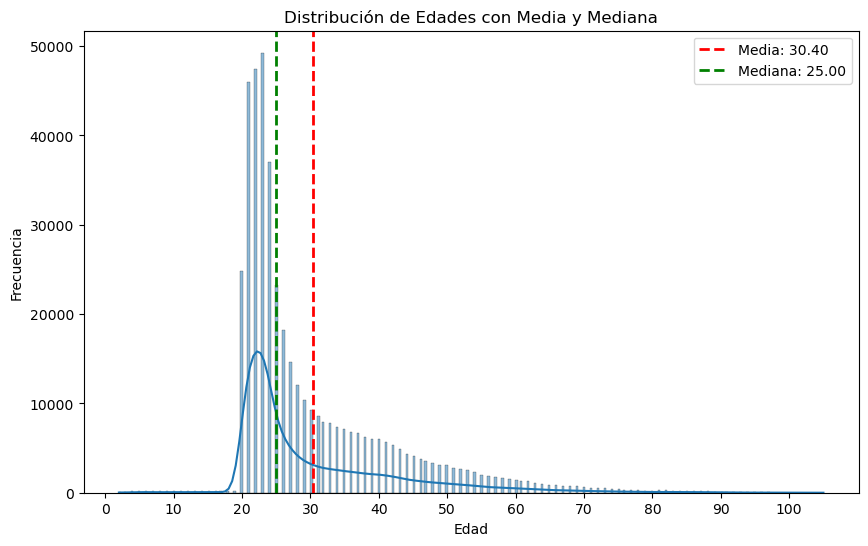

In [48]:
# Crear el histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_total_anal_ult['age'], kde=True)

# Calcular la media y la mediana
media = np.mean(df_total_anal_ult['age'])
mediana = np.median(df_total_anal_ult['age'])

# Dibujar líneas verticales para la media y la mediana
plt.axvline(media, color='red', linestyle='dashed', linewidth=2, label=f'Media: {media:.2f}')
plt.axvline(mediana, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {mediana:.2f}')

plt.title('Distribución de Edades con Media y Mediana')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Establecer etiquetas del eje x en intervalos de 10
plt.xticks(np.arange(0, max(df_total_anal_ult['age']) + 1, 10))

plt.legend()
plt.show()


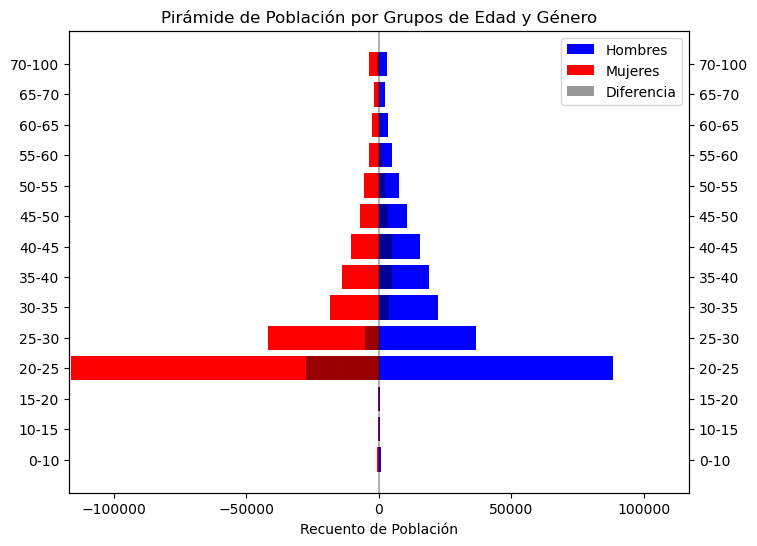

In [49]:
# hacemos una tabla de poblacion (género y edad) para la última partición


# Definir los límites de los grupos de edad
bins = [0, 10, 15,20,25, 30,35, 40, 45, 50, 55, 60, 65, 70, 100]

# Crear grupos de edad y agregarlos al DataFrame
df_total_anal_ult['Grupo de Edad'] = pd.cut(df_total_anal_ult['age'], bins, right=False)

# Calcular el recuento de población en cada grupo de edad para hombres y mujeres
conteo_por_grupo = df_total_anal_ult.groupby(['Grupo de Edad', 'gender']).size().unstack()
conteo_por_grupo['Diferencia'] = conteo_por_grupo['H'] - conteo_por_grupo['V']

# Ordenar los grupos de edad por el rango de edades
conteo_por_grupo = conteo_por_grupo.sort_index()

# Convertir los intervalos en etiquetas legibles
etiquetas_edad = [f'{interval.left}-{interval.right}' for interval in conteo_por_grupo.index]

# Crear la pirámide de población
fig, ax1 = plt.subplots(figsize=(8, 6))

# Graficar las barras para hombres y mujeres
hombres = conteo_por_grupo['V']
mujeres = -conteo_por_grupo['H']

ax1.barh(etiquetas_edad, hombres, color='blue', label='Hombres')
ax1.barh(etiquetas_edad, mujeres, color='red', label='Mujeres')

['#ff9999', '#66b3ff']

# Graficar la diferencia utilizando una línea
ax2 = ax1.twinx()
ax2.barh(etiquetas_edad, conteo_por_grupo['Diferencia']*-1, label='Diferencia', color='black', alpha=0.4)



# Agregar una línea en el punto 0 del eje X
ax1.axvline(0, color='black', linestyle='-', alpha=0.3)
# Personalizar el gráfico
ax1.set_xlabel('Recuento de Población')
ax1.set_title('Pirámide de Población por Grupos de Edad y Género')
# Combina las leyendas de ambas series en una sola leyenda
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

# Ajustar los límites de los ejes y hacerlos simétricos

ax1.set_xlim(-117000, 117000)

plt.show()



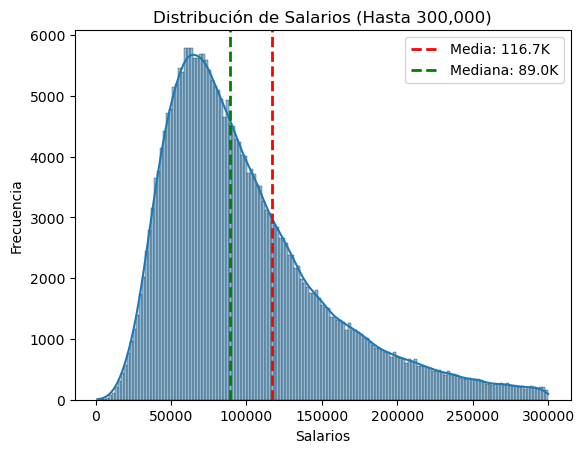

In [50]:
# Define el rango de valores deseados para la visualización
limite_inferior = 0
limite_superior = 300000

# Filtra los datos para la visualización
data_filtrada = df_total_anal_ult[(df_total_anal_ult["salary"] >= limite_inferior) & (df_total_anal_ult["salary"] <= limite_superior)]

# Calcula la media y la mediana en el DataFrame original
media = df_total_anal_ult["salary"].mean()
mediana = df_total_anal_ult["salary"].median()

# Redondea la media y la mediana a millares con un decimal
media_redondeada = round(media / 1000, 1)
mediana_redondeada = round(mediana / 1000, 1)

# Crea un gráfico de distribución
sns.histplot(data=data_filtrada, x='salary', kde=True)

# Dibuja la media y la mediana con los valores redondeados
plt.axvline(media, color='red', linestyle='dashed', linewidth=2, label=f'Media: {media_redondeada:.1f}K')
plt.axvline(mediana, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {mediana_redondeada:.1f}K')

# Personaliza el gráfico (opcional)
plt.title("Distribución de Salarios (Hasta 300,000)")
plt.xlabel("Salarios")
plt.ylabel("Frecuencia")

# Muestra la leyenda
plt.legend()

# Muestra el gráfico
plt.show()


#### Correlación de variables

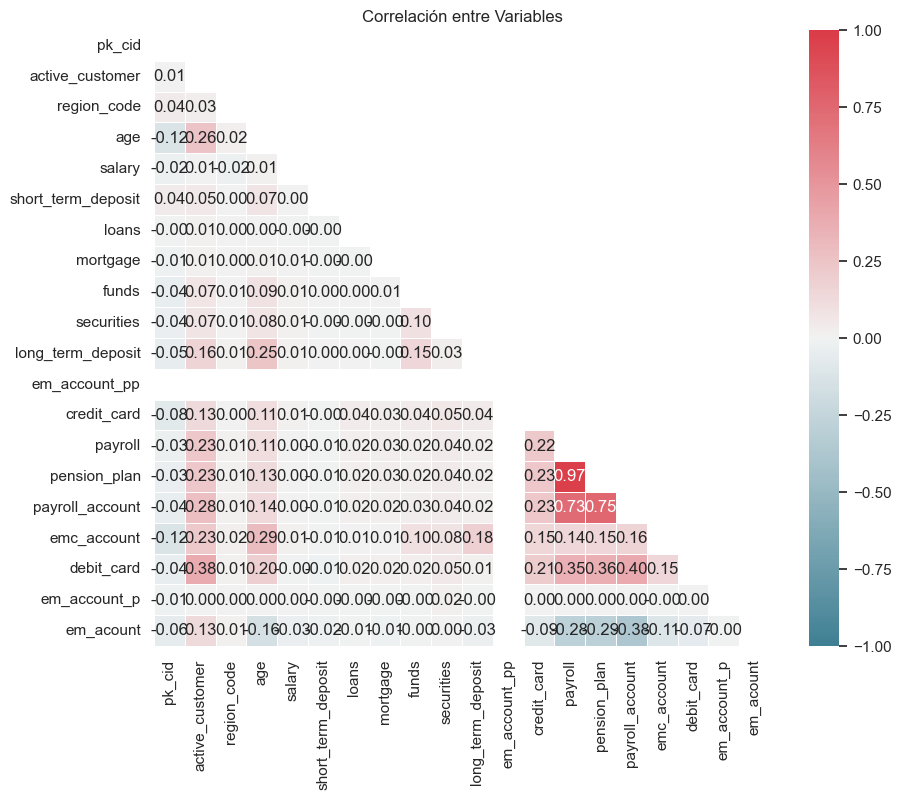

In [52]:
corr_matrix = df_total.corr()

# Configuración de estilo para hacerlo más atractivo
sns.set(style="white") 
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, annot=True, fmt=".2f", linewidths=.5, square=True, vmin=-1, vmax=1)

plt.title('Correlación entre Variables')
plt.show()

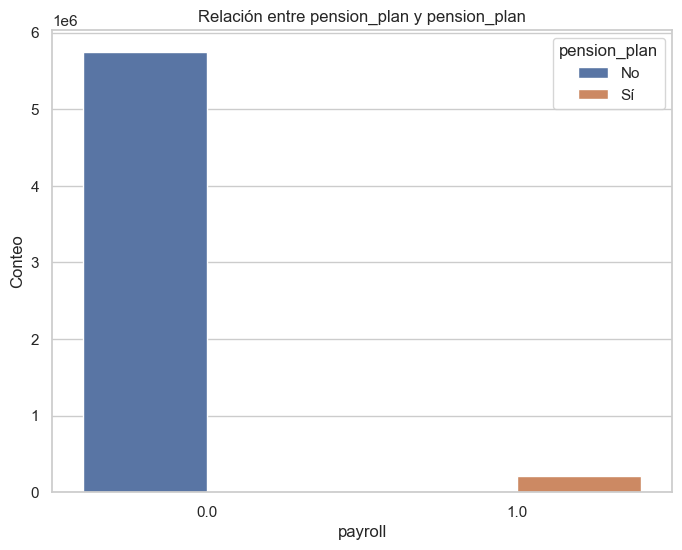

In [53]:
df_total['payroll']
df_total['pension_plan']


# Gráfico de barras apiladas
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=df_total, x="payroll", hue="pension_plan")

# Personalización del gráfico
plt.title("Relación entre pension_plan y pension_plan")
plt.xlabel("payroll")
plt.ylabel("Conteo")
plt.legend(title="pension_plan", labels=["No", "Sí"])
plt.show()

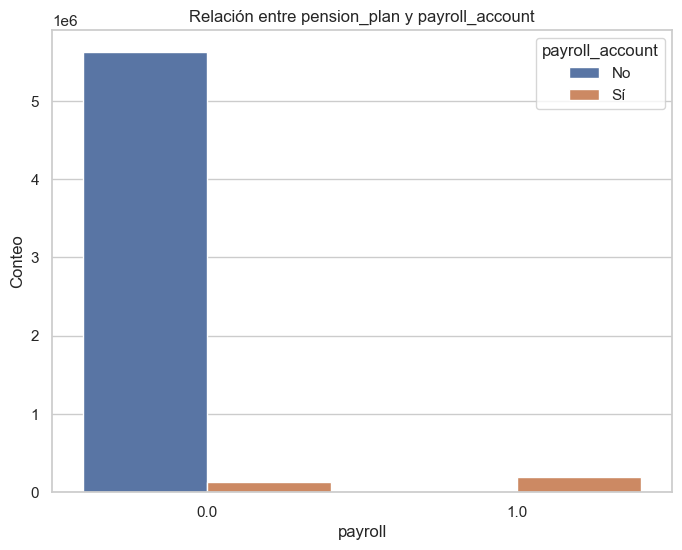

In [54]:
# Gráfico de barras apiladas
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=df_total, x="payroll", hue="payroll_account")

# Personalización del gráfico
plt.title("Relación entre pension_plan y payroll_account")
plt.xlabel("payroll")
plt.ylabel("Conteo")
plt.legend(title="payroll_account", labels=["No", "Sí"])
plt.show()

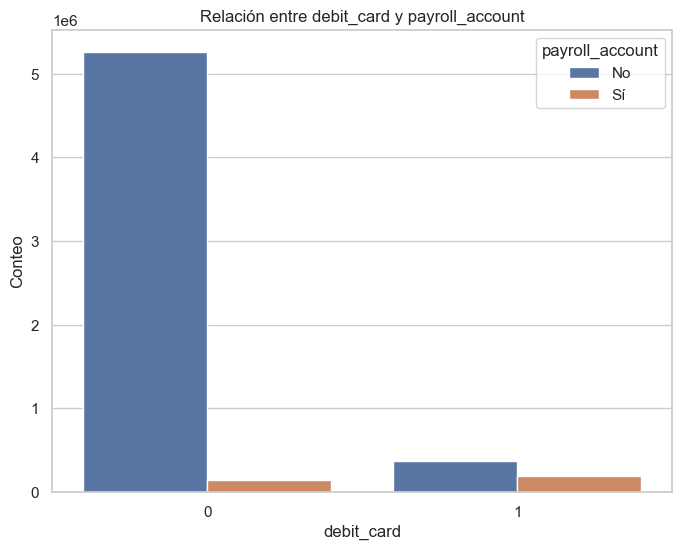

In [55]:
# Gráfico de barras apiladas
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=df_total, x="debit_card", hue="payroll_account")

# Personalización del gráfico
plt.title("Relación entre debit_card y payroll_account")
plt.xlabel("debit_card")
plt.ylabel("Conteo")
plt.legend(title="payroll_account", labels=["No", "Sí"])
plt.show()

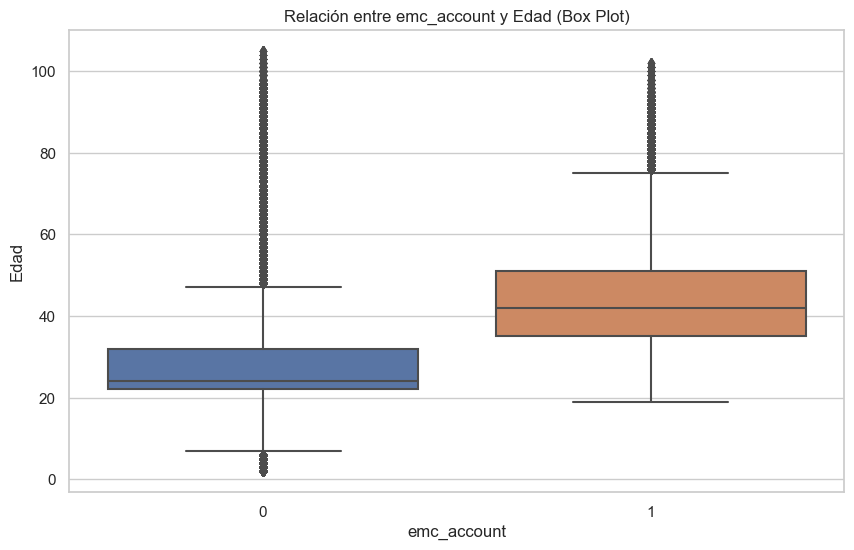

In [56]:
# Crear un gráfico de cajas (box plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='emc_account', y='age', data=df_total)

# Personalizar el gráfico
plt.title('Relación entre emc_account y Edad (Box Plot)')
plt.xlabel('emc_account')
plt.ylabel('Edad')

# Mostrar el gráfico
plt.show()

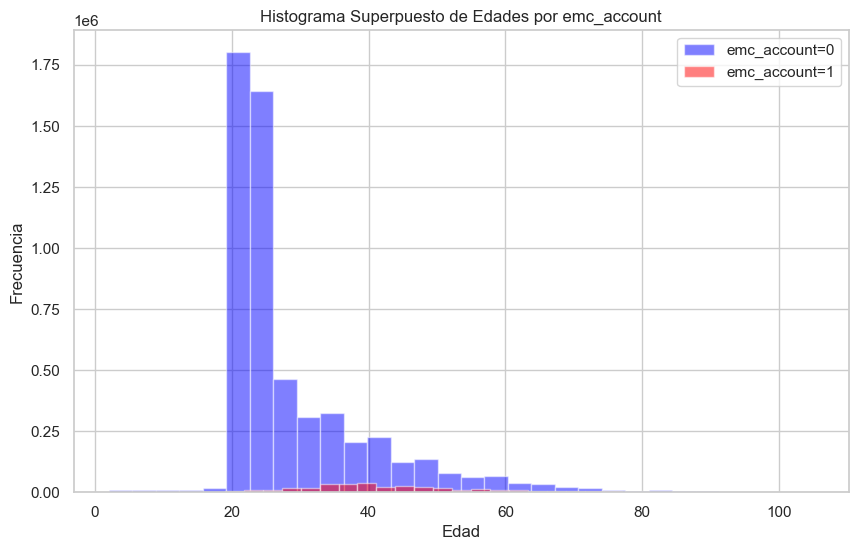

In [57]:
# Filtrar los datos según el valor de la variable binaria
binaria_0 = df_total[df_total['emc_account'] == 0]['age']
binaria_1 = df_total[df_total['emc_account'] == 1]['age']

# Crear un histograma superpuesto
plt.figure(figsize=(10, 6))
plt.hist(binaria_0, bins=30, alpha=0.5, color='blue', label='emc_account=0')
plt.hist(binaria_1, bins=30, alpha=0.5, color='red', label='emc_account=1')

# Personalizar el gráfico
plt.title('Histograma Superpuesto de Edades por emc_account')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend()

# Mostrar el gráfico
plt.show()

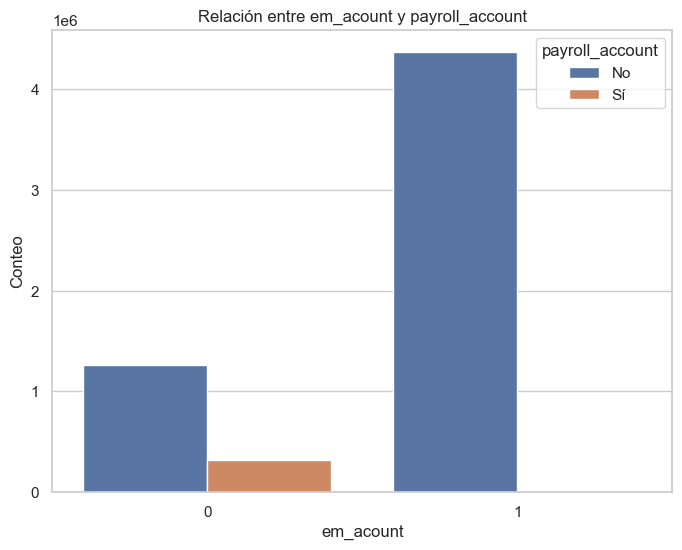

In [58]:
# Gráfico de barras apiladas
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=df_total, x="em_acount", hue="payroll_account")

# Personalización del gráfico
plt.title("Relación entre em_acount y payroll_account")
plt.xlabel("em_acount")
plt.ylabel("Conteo")
plt.legend(title="payroll_account", labels=["No", "Sí"])
plt.show()

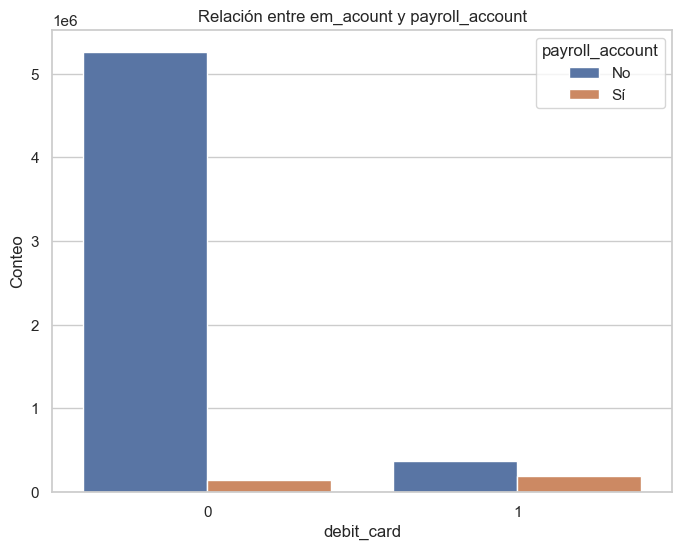

In [59]:
# Gráfico de barras apiladas
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=df_total, x="debit_card", hue="payroll_account")

# Personalización del gráfico
plt.title("Relación entre em_acount y payroll_account")
plt.xlabel("debit_card")
plt.ylabel("Conteo")
plt.legend(title="payroll_account", labels=["No", "Sí"])
plt.show()